In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as nptype

In [2]:
# Undiscounted
RL_DISCOUNT = 1
MAX_CAPITAL = 100


def calc_expected_return(
    capital: int, stake: int, state_value: nptype.NDArray[np.int64], head_prob: float
):
    return (
        head_prob * state_value[capital + stake]
        + (1 - head_prob) * state_value[capital - stake]
    )


def value_iteration(
    head_prob: float, max_iterations: int = 100, min_state_value_change: float = 1e-9
):
    state_value = np.zeros(MAX_CAPITAL + 1)
    state_value[MAX_CAPITAL] = 1
    policy = np.zeros(state_value.shape)

    state_value_histories = []
    for _ in range(max_iterations):
        old_state_value = state_value.copy()
        state_value_histories.append(old_state_value)
        for capital in range(1, MAX_CAPITAL):
            stakes = np.arange(min(capital, MAX_CAPITAL - capital) + 1)
            returns = [
                calc_expected_return(capital, stake, state_value, head_prob)
                for stake in stakes
            ]
            state_value[capital] = np.max(returns)
        max_state_value_change = abs(old_state_value - state_value).max()
        if max_state_value_change < min_state_value_change:
            state_value_histories.append(state_value)
            break
    
    for capital in range(1, MAX_CAPITAL):
        stakes = np.arange(min(capital, MAX_CAPITAL - capital) + 1)
        returns = np.round([
            calc_expected_return(capital, stake, state_value, head_prob)
            for stake in stakes
        ], decimals=5)
        policy[capital] = stakes[np.argmax(returns[1:]) + 1]
    return policy, state_value_histories


In [3]:
def plot_value_estimates(state_value_histories):
    plt.subplot(1, 2, 1)
    for sweep in [1, 2, 3, len(state_value_histories) - 1]:
        state_value = state_value_histories[sweep]
        plt.plot(state_value, label=f'sweep {sweep}')
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')


def plot_policy(policy):
    plt.subplot(1, 2, 2)
    plt.step(np.arange(len(policy)), policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')


def plot_learning(policy, state_value_histories):
    plt.figure(figsize=(16, 6))
    plot_policy(policy)
    plot_value_estimates(state_value_histories)
    plt.show()

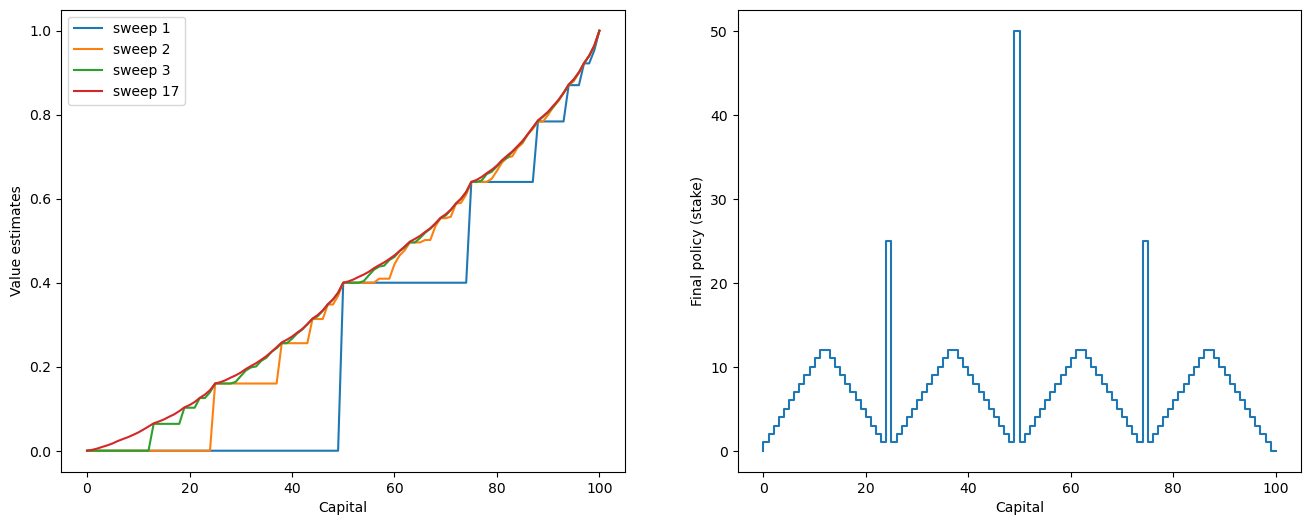

In [4]:
policy, state_value_histories = value_iteration(head_prob=0.4)
plot_learning(policy, state_value_histories)